# Identifying Low Risk Aircraft For A Strong Start In Aviation

This project aims to identify the lowest-risk aircraft for a new business venture into the aviation industry. It covers the following:
- Business Understanding
- Data Understanding 
- Data Preparation
- Data Visualization


# 1. Business Undestanding

## Objective

In this project, a comprehensive risk assessment has been conducted to identify low-risk aircraft options for commercial operations.

## Stakeholders

- The Executive: Responsible for the long-term benefits and financial risks associated with the Industry.
- The Head of Aviation: Responsible for operationalizing the expansion into the aviation industry and for the day-to-day logistics.
- The Finance Team: Responsible for ensuring financial sustainability.
- The Legal Team: They focus on the regulatory requirements and risk mitigation in the aviation sector.

## Key Considerations

- The type of aircraft to be used for commercial and private enterprises.
- How the company can leverage on past data to make informed decisions about aircraft acquisition.


# 2. Data Understanding

## Source of Data

The data used in this notebook is derived from **National Transportation Safety Board(NTSB) Aviation Accident Database** that includes aviation accident data from 1962-2023 about civil aviation accidents and selected incidents in the United States and international waters. The data can be accessed publicly from (https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses)

## Data Description

This dataset contains attributes such as:

* Accident number
* Weather condition
* Investigation type
* Purpose of flight
* Engine type
* Country
* Event date
* Total injuries
* Latitude, Longitude





## Load the Dataset

In [88]:
# Run the cell without changes
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load a CSV file from the extracted folder
csv_file_path = os.path.join(extract_path, "AviationData.csv") 
df = pd.read_csv(csv_file_path, encoding="ISO-8859-1")

# Preview the data
print(df.head())



         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country Latitude Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States      NaN       NaN          NaN   
1   BRIDGEPORT, CA  United States      NaN       NaN          NaN   
2    Saltville, VA  United States  36.9222  -81.8781          NaN   
3       EUREKA, CA  United States      NaN       NaN          NaN   
4       Canton, OH  United States      NaN       NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1          NaN  ...         

C:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# 3. Data Preparation

It involves the following:

- Handling missing values
- Filter for relevant data
- Converting dates to datetime format
- Injury severity score




In [89]:
# Summary statistics
df.info()
df.describe()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

(88889, 31)

In [90]:
# Check for missing values
df.isna()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,...,False,True,False,True,True,True,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,True,True,True,False
88885,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
88886,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
88887,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,True,True,True,True


In [91]:
# Cleaning the dataset
df_cleaned = df.dropna(subset=['Weather.Condition'])
df_cleaned = df_cleaned.reset_index(drop=True)
print(df_cleaned)

             Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001218X45444           Accident      SEA87LA080  1948-10-24   
1      20001218X45447           Accident      LAX94LA336  1962-07-19   
2      20061025X01555           Accident      NYC07LA005  1974-08-30   
3      20001218X45448           Accident      LAX96LA321  1977-06-19   
4      20041105X01764           Accident      CHI79FA064  1979-08-02   
...               ...                ...             ...         ...   
84392  20221212106443           Accident      WPR23LA064  2022-12-09   
84393  20221212106444           Accident      ERA23LA085  2022-12-12   
84394  20221215106463           Accident      ERA23LA090  2022-12-14   
84395  20221219106470           Accident      ERA23LA091  2022-12-16   
84396  20221227106497           Accident      WPR23LA075  2022-12-26   

              Location        Country Latitude Longitude Airport.Code  \
0      MOOSE CREEK, ID  United States      NaN       NaN      

In [92]:
# Convert dates to datetime format
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

In [93]:
# Injury severity score
df['Injury severity'] = (
    df['Total.Fatal.Injuries'] * 3 +
    df['Total.Serious.Injuries'] * 2 +
    df['Total.Minor.Injuries'] * 1
)


In [94]:
# Filter for relevant data
df = df[df['Investigation.Type'] == 'Accident']

# 4. Data Visualization

## Key Business Questions

- Which aircraft has the lowest risk based on the accident history?
- What weather conditions correlate with higher risks?
- How the number of engines in an aircraft translates to the degree of injuries in case of an accident.

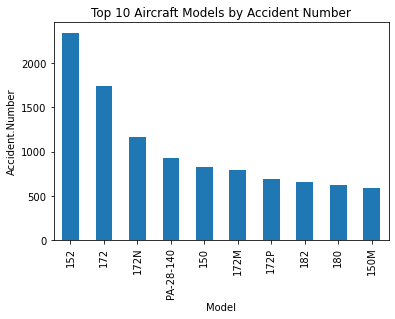

In [95]:
# Lowest risk aircraft
model_accidents = df['Model'].value_counts().head(10)
model_accidents.plot(kind='bar', title='Top 10 Aircraft Models by Accident Number', xlabel='Model', ylabel='Accident.Number')
plt.show()

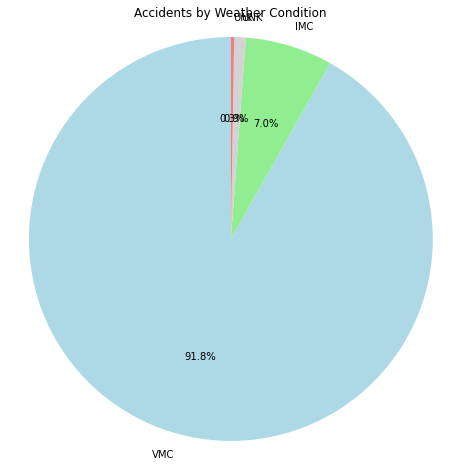

In [96]:
# Number of accidents by weather condition
weather_counts = df['Weather.Condition'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightgray', 'lightcoral', 'lightskyblue'])
plt.title('Accidents by Weather Condition')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

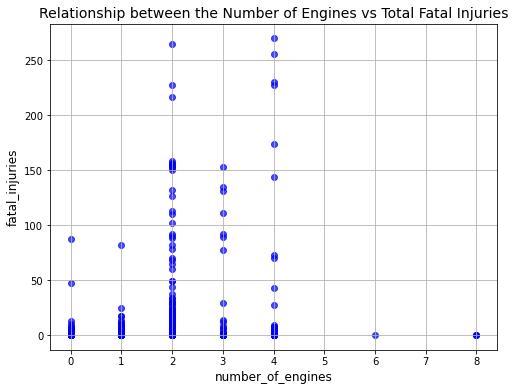

In [97]:
# Scatter plot
number_of_engines= df['Number.of.Engines']
fatal_injuries= df['Total.Fatal.Injuries']

plt.figure(figsize=(8, 6))
plt.scatter(number_of_engines, fatal_injuries, color='blue', alpha=0.7)
plt.title('Relationship between the Number of Engines vs Total Fatal Injuries', fontsize=14)
plt.xlabel('number_of_engines', fontsize=12)
plt.ylabel('fatal_injuries', fontsize=12)
plt.grid(True)
plt.show()

## 5. Conclusion

### Key Findings:
- Aircraft models with the lowest accident rates.
- Weather conditions associated with high risks.
- Aircrafts with fewer engines are associated with higher risks in adverse weather conditions.

### Recommendations:
- The company should focus on acquiring aircrafts with low acciddent numbers.
- More training should be offered with regards to adverse weather conditions.
- Aircraft models with single engines should be avoided in places with adverse weather conditions.